<a href="https://colab.research.google.com/github/halfChewedGum/ECON626Competitions/blob/main/ECON_final_00.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from google.colab import files
uploaded = files.upload()

Saving 01_wrk_data_train.csv to 01_wrk_data_train.csv


In [3]:
import io
df = pd.read_csv(io.BytesIO(uploaded['01_wrk_data_train.csv']))

In [4]:
cols = list(df.columns)

In [5]:
def factorize_els(el_list):
  codes, uniques = pd.factorize(el_list)

  return codes, uniques

In [6]:
df.head()

,Unnamed: 0,Unnamed: 0.1,dollar_price,date_crawled,name,vehicle_type,registration_year,gearbox,power_ps,kilometer,...,fuel_type,unrepaired_damage,ad_created,postal_code,last_seen_online,price,year,km,damage,age
0,0,0,900.0,2016-03-26,Renault_Kangoo_1.4__TÃƒÂœV_01/2018__1._Hand,limousine,2016,manuell,75,150000,...,gasoline,ja,2016,82256,2016-04-06,900.0,2016,150000,1.0,0
1,1,1,7100.0,2016-03-29,BMW_116d_DPF,limousine,2009,manuell,116,90000,...,diesel,nein,2016,30457,2016-03-30,7100.0,2009,90000,0.0,7
2,2,2,500.0,2016-03-23,Volkswagen_Lupo_1.4,small car,1999,manuell,75,150000,...,gasoline,ja,2016,87734,2016-03-23,500.0,1999,150000,1.0,17
3,3,3,35000.0,2016-03-14,Mercedes_Ponton_180b_Oldtimer,limousine,1961,manuell,68,150000,...,gasoline,nein,2016,22941,2016-03-17,35000.0,1961,150000,0.0,55
4,4,4,3700.0,2016-03-10,Fiat_Andere,coup,1972,manuell,52,100000,...,gasoline,ja,2016,6901,2016-04-06,3700.0,1972,100000,1.0,44


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Unnamed: 0          200000 non-null  int64  
 1   Unnamed: 0.1        200000 non-null  int64  
 2   dollar_price        200000 non-null  float64
 3   date_crawled        200000 non-null  object 
 4   name                200000 non-null  object 
 5   vehicle_type        200000 non-null  object 
 6   registration_year   200000 non-null  int64  
 7   gearbox             200000 non-null  object 
 8   power_ps            200000 non-null  int64  
 9   kilometer           200000 non-null  int64  
 10  registration_month  200000 non-null  int64  
 11  fuel_type           200000 non-null  object 
 12  unrepaired_damage   166707 non-null  object 
 13  ad_created          200000 non-null  int64  
 14  postal_code         200000 non-null  int64  
 15  last_seen_online    200000 non-nul

In [8]:
vh = [x for x in df['vehicle_type']]
gr = [x for x in df['gearbox']]
fl = [x for x in df['fuel_type']]

vh_coded = factorize_els(vh)[0]
gr_coded = factorize_els(gr)[0]
fl_coded = factorize_els(fl)[0]


In [9]:
df_copy = df 

df_copy['vehicle_type'] = pd.Series(vh_coded)
df_copy['gearbox'] = pd.Series(gr_coded)
df_copy['fuel_type'] = pd.Series(fl_coded)

df_copy.head()

,Unnamed: 0,Unnamed: 0.1,dollar_price,date_crawled,name,vehicle_type,registration_year,gearbox,power_ps,kilometer,...,fuel_type,unrepaired_damage,ad_created,postal_code,last_seen_online,price,year,km,damage,age
0,0,0,900.0,2016-03-26,Renault_Kangoo_1.4__TÃƒÂœV_01/2018__1._Hand,0,2016,0,75,150000,...,0,ja,2016,82256,2016-04-06,900.0,2016,150000,1.0,0
1,1,1,7100.0,2016-03-29,BMW_116d_DPF,0,2009,0,116,90000,...,1,nein,2016,30457,2016-03-30,7100.0,2009,90000,0.0,7
2,2,2,500.0,2016-03-23,Volkswagen_Lupo_1.4,1,1999,0,75,150000,...,0,ja,2016,87734,2016-03-23,500.0,1999,150000,1.0,17
3,3,3,35000.0,2016-03-14,Mercedes_Ponton_180b_Oldtimer,0,1961,0,68,150000,...,0,nein,2016,22941,2016-03-17,35000.0,1961,150000,0.0,55
4,4,4,3700.0,2016-03-10,Fiat_Andere,2,1972,0,52,100000,...,0,ja,2016,6901,2016-04-06,3700.0,1972,100000,1.0,44


In [10]:
df_copy.to_csv('dataset_00.csv')

In [11]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Unnamed: 0          200000 non-null  int64  
 1   Unnamed: 0.1        200000 non-null  int64  
 2   dollar_price        200000 non-null  float64
 3   date_crawled        200000 non-null  object 
 4   name                200000 non-null  object 
 5   vehicle_type        200000 non-null  int64  
 6   registration_year   200000 non-null  int64  
 7   gearbox             200000 non-null  int64  
 8   power_ps            200000 non-null  int64  
 9   kilometer           200000 non-null  int64  
 10  registration_month  200000 non-null  int64  
 11  fuel_type           200000 non-null  int64  
 12  unrepaired_damage   166707 non-null  object 
 13  ad_created          200000 non-null  int64  
 14  postal_code         200000 non-null  int64  
 15  last_seen_online    200000 non-nul

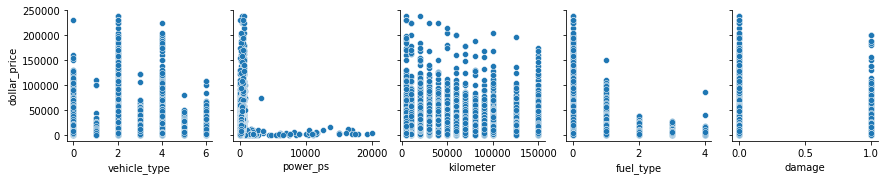

In [12]:

sns.pairplot(df_copy, 
             x_vars = ['vehicle_type', 'power_ps', 'kilometer', 'fuel_type', 'damage'],
             y_vars = ['dollar_price']
             )

Based on the above graphs: 

- vehicle type does make a difference on price.
- power_ps doesn't make any sense really. 
- kilometer kind of does matter, it's mostly a negative linear relationship
- fuel type matters
- damages also matter, as in, if it is damaged (1), the price is lower

In [13]:
features_ = ['vehicle_type', 'registration_year', 'gearbox', 'kilometer', 'fuel_type', 'postal_code', 'damage', 'age']




In [14]:
import itertools

dict_subsets = {}

for L in range(0, len(features_)+1):
    for subset in itertools.combinations(features_, L):
      dict_subsets[L] = subset

dict_subsets        

{0: (),
 1: ('age',),
 2: ('damage', 'age'),
 3: ('postal_code', 'damage', 'age'),
 4: ('fuel_type', 'postal_code', 'damage', 'age'),
 5: ('kilometer', 'fuel_type', 'postal_code', 'damage', 'age'),
 6: ('gearbox', 'kilometer', 'fuel_type', 'postal_code', 'damage', 'age'),
 7: ('registration_year',
  'gearbox',
  'kilometer',
  'fuel_type',
  'postal_code',
  'damage',
  'age'),
 8: ('vehicle_type',
  'registration_year',
  'gearbox',
  'kilometer',
  'fuel_type',
  'postal_code',
  'damage',
  'age')}

In [15]:
for k,v in dict_subsets.items():
  dict_subsets[k] = list(v)




In [16]:
fs_all = ['vehicle_type', 'registration_year', 'gearbox', 'kilometer', 'fuel_type', 'postal_code', 'damage', 'age']
fs_0 = ['vehicle_type', 'gearbox', 'kilometer', 'fuel_type', 'postal_code', 'damage', 'age']
fs_1 = ['vehicle_type', 'gearbox', 'kilometer', 'fuel_type', 'damage', 'age']
fs_2 = ['vehicle_type', 'kilometer', 'fuel_type', 'postal_code', 'damage', 'age']
fs_3 = ['vehicle_type', 'registration_year', 'gearbox', 'kilometer', 'fuel_type', 'postal_code', 'damage']
fs_4 = ['vehicle_type', 'gearbox', 'kilometer', 'fuel_type', 'postal_code', 'damage']
fs_5 = ['vehicle_type', 'gearbox', 'kilometer', 'fuel_type', 'damage']

In [18]:
y = df_copy['dollar_price']
x = df_copy[['vehicle_type', 'registration_year', 'gearbox', 'kilometer', 'fuel_type', 'postal_code', 'damage', 'age']]
x0 = df_copy[['vehicle_type', 'gearbox', 'kilometer', 'fuel_type', 'postal_code', 'damage', 'age']]
x1 = df_copy[['vehicle_type', 'gearbox', 'kilometer', 'fuel_type', 'damage', 'age']]
x2 = df_copy[['vehicle_type', 'kilometer', 'fuel_type', 'postal_code', 'damage', 'age']]
x3 = df_copy[['vehicle_type', 'registration_year', 'gearbox', 'kilometer', 'fuel_type', 'postal_code', 'damage']]
x4 = df_copy[['vehicle_type', 'gearbox', 'kilometer', 'fuel_type', 'postal_code', 'damage']]
x5 = df_copy[['vehicle_type', 'gearbox', 'kilometer', 'fuel_type', 'damage']]

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 0.3, random_state = 42)
x0_train, x0_val, y0_train, y0_val = train_test_split(x0, y, test_size = 0.3, random_state = 42)
x1_train, x1_val, y1_train, y1_val = train_test_split(x1, y, test_size = 0.3, random_state = 42)
x2_train, x2_val, y2_train, y2_val = train_test_split(x2, y, test_size = 0.3, random_state = 42)
x3_train, x3_val, y3_train, y3_val = train_test_split(x3, y, test_size = 0.3, random_state = 42)
x4_train, x4_val, y4_train, y4_val = train_test_split(x4, y, test_size = 0.3, random_state = 42)
x5_train, x5_val, y5_train, y5_val = train_test_split(x5, y, test_size = 0.3, random_state = 42)

# Regression - Q1 

Algorithms to try are : 

- Linear Regression (OLS)
- Lasso Regression
- Ridge Regression 
- Regression Tree
- NN

###LINEAR REGRESSION - OLS

In [29]:
import statsmodels.api as sm 

def try_ols(x, y):
  x = np.array(x)
  y = np.array(y)
  model = sm.OLS(y, sm.add_constant(x, prepend= False))
  result = model.fit()

  return result

In [34]:
x_options = [x, x0, x1, x2, x3, x4, x5]
x_options_train = [x_train, x0_train, x1_train, x2_train, x3_train, x4_train, x5_train]
x_options_val = [x_val, x0_val, x1_val, x2_val, x3_val, x4_val, x5_val]
y_options_train = [y_train, y0_train, y1_train, y2_train, y3_train, y4_train, y5_train]
y_options_val = [y_val, y0_val, y1_val, y2_val, y3_val, y4_val, y5_val]


In [32]:
for i in range(len(x_options)):
  print('For option ', i, ' : ')
  print(try_ols(x_options[i], y).summary())
  print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')


For option  0  : 
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.295
Method:                 Least Squares   F-statistic:                 1.046e+04
Date:                Sun, 10 Apr 2022   Prob (F-statistic):               0.00
Time:                        00:31:40   Log-Likelihood:            -2.0596e+06
No. Observations:              200000   AIC:                         4.119e+06
Df Residuals:                  199991   BIC:                         4.119e+06
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           317.9686      8.639  

### *Regression OLS Results:* 

(all adjusted R squared)

- model 0 :  **0.295**
- model 1 : **0.295**
- model 2 : 0.291
- model 3 : 0.237
- model 4 : **0.295**
- model 5 : 0.277


- model 0 : 
fs_all = ['vehicle_type', 'registration_year', 'gearbox', 'kilometer', 'fuel_type', 'postal_code', 'damage', 'age']

- model 1 : 
fs_0 = ['vehicle_type', 'gearbox', 'kilometer', 'fuel_type', 'postal_code', 'damage', 'age']

- model 4 :
fs_3 = ['vehicle_type', 'registration_year', 'gearbox', 'kilometer', 'fuel_type', 'postal_code', 'damage']


###LASSO REGRESSION

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

def pickAlpha(x, y):
    """
    Pass X values and Y values
    Function will return the best alpha 
    That produces the lowest Absolute error  
    """
    scores = []
    
    model = Lasso()
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    grid = dict()
    grid['alpha'] = np.arange(0, 1, 0.01)
    search = GridSearchCV(model, grid, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
    results = search.fit(x, y)
    print('MSE: %.3f' % results.best_score_)
    print('Config: %s' % results.best_params_)
    

for i in range(len(x_options_train)):
  print('For model ', i)
  pickAlpha(x_options_train[i], y_options_train[i])
  print('-------------------------------------------------')

For model  0


Results are : 

In [ ]:
#train Lasso model with 0.01 Alpha 

best_alpha = 

def lasso_alpha(x, y, x_v, y_v, a):
    lasso_model = Lasso(alpha = a)
    lasso_model.fit(x, y)

    #predictions 
    lasso_pred = lasso_model.predict(x_v)

    from sklearn.metrics import mean_squared_error
    from sklearn.metrics import r2_score

    mse = mean_squared_error(y_v, lasso_pred)
    r2 = r2_score(y_v, lasso_pred)

    print("MSE for Lasso with alpha ", a, " is: ", mse)
    print("R2 for Lasso with alpha ", a, "is: ", r2)
    
lasso_alpha(x_train, y_train, x_val, y_val, best_alpha)

In [ ]:
#using LassoCV for alpha: 
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def lasso_cv_func(x, y, x_v, y_v):
    lasso_cv = LassoCV(cv = 5, random_state = 42).fit(x, y)
    print("lasso cv score for train set: ", lasso_cv.score(x, y))
    print("lasso cv score for validation set: ", lasso_cv.score(x_v, y_v))

    lasso_cv_pred = lasso_cv.predict(x_v)
    mse_lassoCv = mean_squared_error(y_v, lasso_cv_pred)
    r2_lassoCv = r2_score(y_v, lasso_cv_pred)

    print("MSE for Lasso CV: ", mse_lassoCv)
    print("R2 for Lasso CV: ", r2_lassoCv)

lasso_cv_func(x_train, y_train, x_val, y_val)

Since these are the results, I will go through all the possible feature sets and test those. 


In [ ]:
#Feature Selection

#Backward (Recursive)  
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline

def make_models(alpha):
    """
    Use RFE to build different models with different numbers of features 
    Returns a dictionary of all the different models 
    """
    
    models = dict()
    for i in range(1,9):
        #all 13 are considered here 
        rfe = RFE(estimator = Lasso(), n_features_to_select = i)
        model = Lasso(alpha= alpha)
        models[str(i)] = Pipeline(steps = [('s', rfe),('m', model)])

    return models 
 
def evaluate_model(model, x, y):
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, x, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
    scores = np.absolute(scores)
    
    return scores
    
models_all = make_models(best_alpha)
results = []
model_name = []

print("Considering All features:")
for name, model in models_all.items():
    scores = evaluate_model(model, x, y)
    results.append(scores)
    model_name.append(name)
    
    
    print("Model %s has MSE of %.3f" %(name, np.mean(scores)))



###RIDGE REGRESSION


In [ ]:
from sklearn.linear_model import Ridge 

def find_alpha(x, y):
    """
    Find the best alpha value based on training set.
    """
    scores = []
    model = Ridge()
    cv = RepeatedKFold(n_splits = 10, n_repeats = 5, random_state = 1)
    grid = dict()
    grid['alpha'] = np.arange(0, 1, 0.01) #possible alpha values 
    search = GridSearchCV(model, grid, scoring='neg_mean_squared_error', cv = cv, n_jobs = -1)
    results = search.fit(x, y)
    
    print('MSE: ', results.best_score_)
    print('alpha: ', results.best_params_)

find_alpha(x_train, y_train)

In [ ]:
#modeling 
ridge_best_alpha = 
ridge_model = Ridge(alpha = ridge_best_alpha)

ridge_fit = ridge_model.fit(x_train, y_train)
ridge_pred = ridge_fit.predict(x_val) 

#how well does this do? 
mse = mean_squared_error(y_val, ridge_pred)
r2 = r2_score(y_val,ridge_pred)

print('MSE: ', mse)
print('R2: ', r2)

###REGRESSION TREE

In [ ]:
#KNN

from sklearn.model_selection import train_test_split

#note: id is dropped, since it has nothing to do with predictions. 

x_train, x_val, y_train, y_val = train_test_split(final_x, y, test_size=0.3, random_state = 0)

from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics

def find_best_k(x,y, x_val, y_val):
    """
    find best K for KNN
    """
    accuracy = []
    
    for i in range(1,21):
        knn = KNeighborsClassifier(n_neighbors = i).fit(x,y)
        preds = knn.predict(x_val)
        accuracy.append(metrics.accuracy_score(y_val, preds))
        
    return max(accuracy), accuracy
    
bestK = find_best_k(x_train, y_train, x_val, y_val)[0]
acc = find_best_k(x_train, y_train, x_val, y_val)[1]

indices = [i for i, x in enumerate(acc) if x == bestK]

print("best accuracy is: ", bestK)
print("best k for this: ", indices)

commented these out because it takes a while to run! I ran it once and got "19" - using that after this. Commenting this out so that future runs don't take as long. 

    

In [ ]:
#final prediction : 

#logarithm of prices

log_prices = np.array(df_copy['dollar_price'])
log_prices = np.log(log_prices)

df_copy['log_prices'] = pd.Series(log_prices)

df_copy.head()